In [1]:
rootF = 'D:/Data/Paper defocus/Defocus detection data/'

In [2]:
import os as os
import sys
import csv

from numpy import *
from scipy.stats import linregress, wilcoxon

from matplotlib.pyplot import *
import seaborn as sns
from matplotlib import gridspec
from matplotlib.gridspec import SubplotSpec
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.patches as pcs
from matplotlib.patches import Ellipse

from shared.save_load import *
from shared.functions import corrcoef, convert_pvalue_to_stars

In [3]:
experiments = [20211129, 20211207, 20211208]
trials = [20, 37, 67]
run_nbs = [65, 58, 30]
N_cells = [21, 32, 29]

# Experiment conditions
from shared.parameters_stimulation2 import *
pixel_size_um = 3.5
pixel_per_check = 12
nb_checks = 60

defocuses = linspace(40, -40, 9)
mouse_dF_to_um_ratio = -5 #um
mouse_offset = defocuses * mouse_dF_to_um_ratio

# Load data

### Load selected cell's responses to blurred images

In [4]:
clusters_all_experiments = []

for iExp, exp in enumerate(experiments):
    print (exp)
    trial = trials[iExp]
    run_nb = run_nbs[iExp]
    n_cells = N_cells[iExp]
    print (n_cells, 'cells')
    data_path = rootF + '/Modelling/exp' + str(exp) + '/'
    data_CNN_cells = load(data_path + '{}_spike_counts_CNN_{}cells_tr{}_run{}.npz'.format(exp, n_cells, trial, run_nb))

    spike_counts_mean = data_CNN_cells['spike_count_mean'] * 1/0.3
    spike_counts_std = data_CNN_cells['spike_count_std'] * 1/0.3
    clusters = data_CNN_cells['clusters']
    clusters_all_experiments.append(clusters)

    print (clusters)

20211129
21 cells
[  1  96 140 141 200 234 293 314 347 390 396 401 406 416 417 424 437 508
 558 583 614]
20211207
32 cells
[ 52  89  95  98 107 129 148 179 186 217 303 359 378 381 386 388 393 394
 396 399 402 414 417 418 433 435 459 472 491 498 507 575]
20211208
29 cells
[ 20  56  62  83 130 138 168 238 263 280 285 368 380 382 411 419 424 435
 450 463 464 466 480 482 497 507 511 513 613]


### CNN predictions

1000 images

In [5]:
model_spike_counts_all_experiments = []

for iExp, exp in enumerate(experiments):
    print (exp)
    trial = trials[iExp]
    run_nb = run_nbs[iExp]
    n_cells = N_cells[iExp]
    model_predictions = load(rootF + "/Modelling/exp" + str(exp) + "/model_predictions_mouse_cnn_1000images_" + str(exp) + "_" + \
                                str(n_cells) + "cells_tr" + str(trial) + "_run" + str(run_nb) + ".npz")
    model_spike_counts = model_predictions['predictions'] * 1/0.3
    imagesNbs = model_predictions['images']
    print (model_spike_counts.shape)

    model_spike_counts_all_experiments.append(model_spike_counts)

20211129
(999, 2, 9, 4, 21)
20211207
(1000, 2, 9, 4, 32)
20211208
(999, 2, 9, 4, 29)


### Typing data

In [6]:
Folder = rootF + '/MEA/RGC typing/calcium comparison/'

euler_labels_f = open(Folder + 'Baden Types');
euler_labels_f = csv.reader(euler_labels_f,delimiter=",");
euler_labels={}
c=0
for row in euler_labels_f:
    if c==0:
        stim_cond_head = row
        c=1
    else:
        euler_labels[c-1]= row
        c+=1     
        
euler_label_names = []

for i in range(len(euler_labels)):
    euler_label_names.append(euler_labels[i][0])

In [7]:
# For each type, we store the corresponding cells per experiment 

euler_labels_cells_all_experiments = []
cells_clustering_all_experiments = []

for iLabel in range(len(euler_labels)):
    print (euler_labels[iLabel][0])
    euler_labels_cells = []
    
    for iExp, exp in enumerate(experiments):
        trial = trials[iExp]
        run_nb = run_nbs[iExp]
        n_cells = N_cells[iExp]
        exp_path = rootF + '/MEA/exp' + str(exp) + '/'

        # Load cells
        cells_clustering = load_obj(exp_path + str(exp) + '_selected_cells_clustering')
        cells_clustering = array(cells_clustering)
        if exp == 20211208:
            cell_types = load_obj(exp_path + str(exp) + '_celltype_Baden_cleaned_clus12_2024')
        else:
            cell_types = load_obj(exp_path + str(exp) + '_celltype_Baden_cleaned_2024')

        cell_type = euler_labels[iLabel][0]
        selected_cells = cells_clustering[cell_types == iLabel]
        print (exp, selected_cells)

        euler_labels_cells.append(selected_cells)

    euler_labels_cells_all_experiments.append(euler_labels_cells)

# euler_labels_cells_all_experiments = np.array(euler_labels_cells_all_experiments)

OFF local OS
20211129 []
20211207 []
20211208 [ 86 136 276 292 318 389 438]
OFF DS
20211129 []
20211207 [ 63 120 298 583]
20211208 []
OFF step
20211129 [390]
20211207 []
20211208 []
OFF slow
20211129 [140 508 625]
20211207 [240 253 277 378]
20211208 [ 20 125 195]
OFF alpha sustained
20211129 [437 677]
20211207 [ 26 421]
20211208 []
ON-OFF JAM-B
20211129 [399 401]
20211207 [205 507]
20211208 [138 263 271 411 419 420 421 450 464 471 480]
OFF sustained
20211129 []
20211207 [394 414 433 459 471 515]
20211208 []
OFF alpha transient
20211129 [ 79 422]
20211207 []
20211208 [ 10 361]
OFF mini alpha transient
20211129 []
20211207 [148 303 398 426 506 538]
20211208 [210 382 387 441 466 497 576 580 605 613]
ON-OFF local-edge W3
20211129 [188 614]
20211207 [392]
20211208 [368]
ON-OFF local
20211129 []
20211207 [44]
20211208 [83]
ON-OFF DS 1
20211129 []
20211207 []
20211208 []
ON-OFF DS 2
20211129 []
20211207 []
20211208 [359 532 592]
ON-OFF local OS
20211129 [ 27 558 681]
20211207 [165]
20211208 [

In [8]:
OFF_slow = hstack([euler_labels_cells_all_experiments[3][0], euler_labels_cells_all_experiments[3][1], euler_labels_cells_all_experiments[3][2]])
ON_OFF_local = hstack([euler_labels_cells_all_experiments[13][0], euler_labels_cells_all_experiments[13][1], euler_labels_cells_all_experiments[13][2]])

OFF_slow

array([140, 508, 625, 240, 253, 277, 378,  20, 125, 195], dtype=int64)

### Liu 2022 data

From the code 'Liu_2022'

In [9]:
output_folder = rootF + '/Modelling/'

liu_2022_data = load(output_folder + 'data_figure_4.npz', allow_pickle=True)

selected_cells_liu_2022 = liu_2022_data['selected_cells']
x_LN = liu_2022_data['intensity']
spike_counts = liu_2022_data['spike_counts']
x_vals_LN = liu_2022_data['x_pred_LN']
predictions_LN = liu_2022_data['predictions_LN']
x_LSC = liu_2022_data['intensity_and_SC']
x_vals_LSC = liu_2022_data['x_pred_LSC']
predictions_LSC = liu_2022_data['predictions_LSC']
explained_variance_LN = liu_2022_data['expl_var_LN']
explained_variance_LSC = liu_2022_data['expl_var_LSC']

print (explained_variance_LN)
print (selected_cells_liu_2022)

[array([0.47117168, 0.83375116, 0.86210898, 0.50592979])
 array([0.07215822, 0.68960258, 0.84359427, 0.75147107])
 array([0.72926226, 0.48253895, 0.56764001, 0.63862153, 0.80199894,
        0.84452618, 0.7141522 ])                                   ]
[list([140, 508, 625, 681]) list([165, 253, 277, 378])
 list([20, 119, 125, 130, 195, 380, 460])]


### Original images

In [10]:
path_to_original_images = rootF + '/Eye model simulations/original images/'

images = ['1','2','3','5']

### Ellipses

In [11]:
# Cell's ellipse
exp = 20211208
ell_path = rootF + '/contrast analysis/ellipses_data_with_weights_2sigma_' + str(exp) 

ellipse_data_2s = load_obj(ell_path + '.pkl')

# Computing the proportion of images with same sign

In [12]:
euler_labels_cells_all_experiments[3]

[array([140, 508, 625], dtype=int64),
 array([240, 253, 277, 378], dtype=int64),
 array([ 20, 125, 195], dtype=int64)]

In [13]:
idx_ref = 0
iLabel = 3

r_slow = []
prop_same_sign_slow = []

for src in [0,2]:
    prop_same_sgn_ecc = []
    for iExp in range(len(experiments)):
        for cell_nb in euler_labels_cells_all_experiments[iLabel][iExp]:
            index = where(clusters_all_experiments[iExp] == cell_nb)[0]
            if len(index) > 0:
                index = index[0]

                dAct_original = model_spike_counts_all_experiments[iExp][:, 0, -1, src, index] \
                                - model_spike_counts_all_experiments[iExp][:, 0, idx_ref, src, index]
                dAct_neg = model_spike_counts_all_experiments[iExp][:, 1, -1, src, index] \
                                - model_spike_counts_all_experiments[iExp][:, 1, idx_ref, src, index]
                
                prop_same_sgn_ecc.append(100*(len(np.where(np.sign(dAct_original) == np.sign(dAct_neg))[0])/len(dAct_original)))
    prop_same_sign_slow.append(prop_same_sgn_ecc)

In [14]:
iLabel = 13
prop_same_sign_local = []

for src in [0,2]:
    prop_same_sgn_ecc = []
    for iExp in range(len(experiments)):
        for cell_nb in euler_labels_cells_all_experiments[iLabel][iExp]:
            index = where(clusters_all_experiments[iExp] == cell_nb)[0]
            if len(index) > 0:
                index = index[0]
                dAct_original = model_spike_counts_all_experiments[iExp][:, 0, -1, src, index] \
                                - model_spike_counts_all_experiments[iExp][:, 0, idx_ref, src, index]
                dAct_neg = model_spike_counts_all_experiments[iExp][:, 1, -1, src, index] \
                                - model_spike_counts_all_experiments[iExp][:, 1, idx_ref, src, index]
                
                prop_same_sgn_ecc.append(100*(len(np.where(np.sign(dAct_original) == np.sign(dAct_neg))[0])/len(dAct_original)))
    prop_same_sign_local.append(prop_same_sgn_ecc)

In [15]:
iLabel = 23
prop_same_sign_alpha = []

for src in [0,2]:
    prop_same_sgn_ecc = []
    for iExp in range(len(experiments)):
        for cell_nb in euler_labels_cells_all_experiments[iLabel][iExp]:
            index = where(clusters_all_experiments[iExp] == cell_nb)[0]
            if len(index) > 0:
                index = index[0]

                dAct_original = model_spike_counts_all_experiments[iExp][:, 0, -1, src, index] \
                                - model_spike_counts_all_experiments[iExp][:, 0, idx_ref, src, index]
                dAct_neg = model_spike_counts_all_experiments[iExp][:, 1, -1, src, index] \
                                - model_spike_counts_all_experiments[iExp][:, 1, idx_ref, src, index]
                
                prop_same_sgn_ecc.append(100*(len(np.where(np.sign(dAct_original) == np.sign(dAct_neg))[0])/len(dAct_original)))
    prop_same_sign_alpha.append(prop_same_sgn_ecc)

# Figures

### V2

Example cell:  130
R2 intensity model 0.6539018537317938 0.05252744077769093
R2 contrast model 0.7235440605415137 0.03951100383544575
p-value =  0.00335693359375
OFF slow
20
r2 =  0.11571229986111262
ON OFF local OS
130
r2 =  0.5995044469660542
ON alpha
435
r2 =  -0.6274030128558484
Example cell: 130


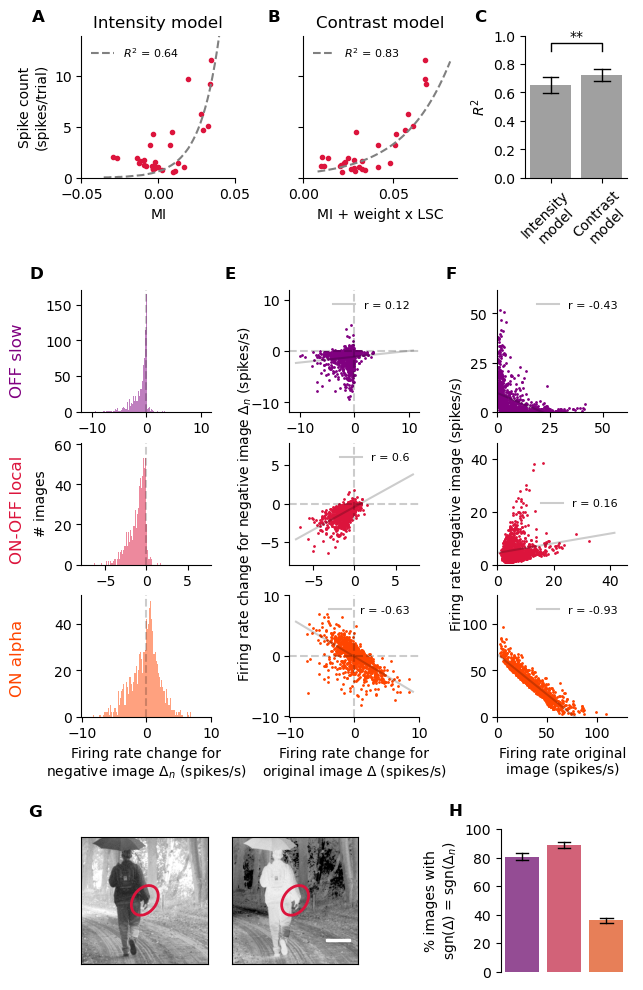

In [16]:
idx_ref = 0
src = 0

fig = figure(figsize=(6.5, 10))
GS = fig.add_gridspec(3, 1, height_ratios = [1,3,1])

#################################### CONTRAST MODEL ###########################################################

gs = gridspec.GridSpecFromSubplotSpec(1, 3, subplot_spec=GS[0], wspace = 0.5, width_ratios = [3,3,2])

### Example cell
iExp = 2
iCell = 3
print ('Example cell: ', selected_cells_liu_2022[iExp][iCell])
ax = fig.add_subplot(gs[0])
ax.plot(x_LN, spike_counts, '.', color='crimson')
ax.plot(x_vals_LN, predictions_LN, '--', color='grey', label = '$R^2$ = %0.02f'%explained_variance_LN[iExp][iCell])
ax.set_xlabel('MI')
ax.set_ylabel('Spike count\n(spikes/trial)')
ax.set_title('Intensity model')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(frameon=False, fontsize=8)
ax.set_xlim(-0.05, 0.05)
ax.set_ylim(0, 14)
ax.text(-0.05 * 1.65, 14 * 1.1, 'A', color='k', fontsize = 12, weight='bold')

ax = fig.add_subplot(gs[1])
ax.plot(x_LSC, spike_counts, '.', color='crimson')
ax.plot(x_vals_LSC, predictions_LSC, '--',  color='grey' , label = '$R^2$ = %0.02f'%explained_variance_LSC[iExp][iCell])
ax.set_xlabel('MI + weight x LSC')
ax.set_title('Contrast model')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(frameon=False, fontsize=8)
ax.set_xlim(0, None)
ax.set_ylim(0, 14)
ax.set_yticklabels([])
ax.text(-0.02, 14 * 1.1, 'B', color='k', fontsize = 12, weight='bold')

### Population

stacked_lsc_expl_vars = hstack([explained_variance_LSC[0], explained_variance_LSC[1], explained_variance_LSC[2]])
stacked_ln_expl_vars = hstack([explained_variance_LN[0], explained_variance_LN[1], explained_variance_LN[2]])

print ('R2 intensity model', mean(stacked_ln_expl_vars), std(stacked_ln_expl_vars)/sqrt(len(stacked_ln_expl_vars)))
print ('R2 contrast model', mean(stacked_lsc_expl_vars), std(stacked_lsc_expl_vars)/sqrt(len(stacked_lsc_expl_vars)))

ax = fig.add_subplot(gs[2])
ax.set_ylim(0, 1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# p-value
test = wilcoxon(stacked_ln_expl_vars, stacked_lsc_expl_vars)
print ('p-value = ', test[1])
x1, x2 = 0, 1
y, h, col = max(hstack([stacked_ln_expl_vars, stacked_lsc_expl_vars])), 0.05, 'k'
ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c=col)
ax.text((x1+x2)*.5, y+h, str(convert_pvalue_to_stars(test[1])), ha='center', va='bottom', color=col)
# plot
sns.barplot(data = [stacked_ln_expl_vars, stacked_lsc_expl_vars], color = 'grey', alpha = 0.75, \
            errorbar = 'se', errcolor='k', errwidth = 1, capsize = 0.3)
ax.set_xticklabels(['Intensity\nmodel', 'Contrast\nmodel'], rotation=45)
ax.set_ylabel('$R^2$')
ax.text(-1.5, 1.1, 'C', color='k', fontsize = 12, weight='bold')

#################################### NEGATIVE IMAGES ##########################################################

gs = gridspec.GridSpecFromSubplotSpec(3, 3, subplot_spec=GS[1], wspace = 0.6, hspace = 0.25, width_ratios = [3,3,3])

##### OFF slow, cluster 20
print ('OFF slow')
iExp = 2
cell_nb = 20 
index = where(clusters_all_experiments[iExp] == cell_nb)[0][0] 

print (cell_nb)

lim_min = amin(model_spike_counts_all_experiments[iExp][:, 0, -1, src, index] \
               - model_spike_counts_all_experiments[iExp][:, 0, idx_ref, src, index])
lim_max = amax(model_spike_counts_all_experiments[iExp][:, 0, -1, src, index] \
               - model_spike_counts_all_experiments[iExp][:, 0, idx_ref, src, index])
lim = 1.2*max(abs(lim_min), lim_max)

dAct_original = model_spike_counts_all_experiments[iExp][:, 0, -1, src, index] \
                - model_spike_counts_all_experiments[iExp][:, 0, idx_ref, src, index]
dAct_neg = model_spike_counts_all_experiments[iExp][:, 1, -1, src, index] \
                - model_spike_counts_all_experiments[iExp][:, 1, idx_ref, src, index]

slope, intercept, r, p, se = linregress(dAct_original, dAct_neg)
print ('r2 = ', r)

### Histo neg
ax = fig.add_subplot(gs[0,0])
ax.axvline(0, color='k',ls='--',alpha=0.2)
ax.hist(dAct_neg, bins=100, alpha=0.5, histtype='stepfilled', color='purple')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlim(-lim, lim)
ax.set_ylim(0, 170)
ax.text(-lim*2.1, 25, 'OFF slow', rotation = 'vertical', color='purple', fontsize = 12)
ax.text(-lim*1.8, 170 * 1.1, 'D', color='k', fontsize = 12, weight='bold')

### Scatter delta 
ax = fig.add_subplot(gs[0,1])
ax.axvline(0, color='k',ls='--',alpha=0.2)
ax.axhline(0, color='k',ls='--',alpha=0.2)
ax.scatter(dAct_original, dAct_neg, s=1, color = 'purple')
ax.plot(np.linspace(-0.9*lim, 0.9*lim, 11), intercept + slope*np.linspace(-0.9*lim, 0.9*lim, 11), color='k', alpha=0.2, \
                        label = 'r = {}'.format(round(r,2)))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlim(-lim, lim)
ax.set_ylim(-lim, lim)
ax.text(-lim*2, lim * 1.2, 'E', color='k', fontsize = 12, weight='bold')
ax.legend(frameon=False, fontsize=8)

### Scatter
idx_scatter = 4
lim = 1.2*amax(model_spike_counts_all_experiments[iExp][:, :, idx_scatter, src, index])
slope, intercept, r, p, se = linregress(model_spike_counts_all_experiments[iExp][:, 0, idx_scatter, src, index], \
                                        model_spike_counts_all_experiments[iExp][:, 1, idx_scatter, src, index])
ax = fig.add_subplot(gs[0,2])
ax.scatter(model_spike_counts_all_experiments[iExp][:, 0, idx_scatter, src, index], \
           model_spike_counts_all_experiments[iExp][:, 1, idx_scatter, src, index],\
            s=1, color = 'purple')
ax.plot(np.linspace(-0.9*lim, 0.9*lim, 11), intercept + slope*np.linspace(-0.9*lim, 0.9*lim, 11), color='k', alpha=0.2, \
                        label = 'r = {}'.format(round(r,2)))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlim(0, lim)
ax.set_ylim(0, lim)
ax.set_xticks([0,25,50])
ax.set_yticks([0,25,50])
ax.text(-lim*0.4, lim * 1.1, 'F', color='k', fontsize = 12, weight='bold')
ax.legend(frameon=False, fontsize=8)

##### ON-OFF local
print ('ON OFF local OS')
iExp = 2
cell_nb = 130
index = where(clusters_all_experiments[iExp] == cell_nb)[0][0]
print (cell_nb)

lim_min = amin(model_spike_counts_all_experiments[iExp][:, 0, -1, src, index] \
               - model_spike_counts_all_experiments[iExp][:, 0, idx_ref, src, index])
lim_max = amax(model_spike_counts_all_experiments[iExp][:, 0, -1, src, index] \
               - model_spike_counts_all_experiments[iExp][:, 0, idx_ref, src, index])
lim = 1.2*max(abs(lim_min), lim_max)

dAct_original = model_spike_counts_all_experiments[iExp][:, 0, -1, src, index] \
                - model_spike_counts_all_experiments[iExp][:, 0, idx_ref, src, index]
dAct_neg = model_spike_counts_all_experiments[iExp][:, 1, -1, src, index] \
                - model_spike_counts_all_experiments[iExp][:, 1, idx_ref, src, index]

slope, intercept, r, p, se = linregress(dAct_original, dAct_neg)
print ('r2 = ', r)

### Histo neg
ax = fig.add_subplot(gs[1,0])
ax.axvline(0, color='k',ls='--', alpha=0.2)
ax.hist(dAct_neg, bins=100, alpha=0.5, histtype='stepfilled', color='crimson') #alpha=0.75, color = 'C0')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlim(-lim, lim)
ax.set_ylabel('# images')
ax.text(-lim*2.1, 2, 'ON-OFF local', rotation = 'vertical', color='crimson', fontsize = 12)

### Scatter Delta
ax = fig.add_subplot(gs[1,1])
ax.axvline(0, color='k',ls='--',alpha=0.2)
ax.axhline(0, color='k',ls='--',alpha=0.2)
ax.scatter(dAct_original, dAct_neg, s=1, color = 'crimson')
ax.plot(np.linspace(-0.9*lim, 0.9*lim, 11), intercept + slope*np.linspace(-0.9*lim, 0.9*lim, 11), color='k', alpha=0.2, \
                        label = 'r = {}'.format(round(r,2)))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlim(-lim, lim)
ax.set_ylim(-lim, lim)
ax.set_ylabel('Firing rate change for negative image $\Delta_n$ (spikes/s)')
ax.legend(frameon=False, fontsize=8)

### Scatter
idx_scatter = 4
lim = 1.2*amax(model_spike_counts_all_experiments[iExp][:, :, idx_scatter, src, index])
slope, intercept, r, p, se = linregress(model_spike_counts_all_experiments[iExp][:, 0, idx_scatter, src, index], \
                                        model_spike_counts_all_experiments[iExp][:, 1, idx_scatter, src, index])
ax = fig.add_subplot(gs[1,2])
# ax.plot([0,lim*0.8], [0,lim*0.8], color='k', ls='--',alpha=0.2)
ax.scatter(model_spike_counts_all_experiments[iExp][:, 0, idx_scatter, src, index], \
           model_spike_counts_all_experiments[iExp][:, 1, idx_scatter, src, index],\
            s=1, color = 'crimson')
ax.plot(np.linspace(-0.9*lim, 0.9*lim, 11), intercept + slope*np.linspace(-0.9*lim, 0.9*lim, 11), color='k', alpha=0.2, \
                        label = 'r = {}'.format(round(r,2)))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlim(0, lim)
ax.set_ylim(0, lim)
ax.set_ylabel('Firing rate negative image (spikes/s)')
ax.legend(frameon=False, fontsize=8)

##### ON alpha, cluster 449
print ('ON alpha')
iExp = 2
cell_nb = 435 
index = where(clusters_all_experiments[iExp] == cell_nb)[0][0] 

print (cell_nb)

lim_min = amin(model_spike_counts_all_experiments[iExp][:, 0, -1, src, index] \
               - model_spike_counts_all_experiments[iExp][:, 0, idx_ref, src, index])
lim_max = amax(model_spike_counts_all_experiments[iExp][:, 0, -1, src, index] \
               - model_spike_counts_all_experiments[iExp][:, 0, idx_ref, src, index])
lim = 1.2*max(abs(lim_min), lim_max)

dAct_original = model_spike_counts_all_experiments[iExp][:, 0, -1, src, index] \
                - model_spike_counts_all_experiments[iExp][:, 0, idx_ref, src, index]
dAct_neg = model_spike_counts_all_experiments[iExp][:, 1, -1, src, index] \
                - model_spike_counts_all_experiments[iExp][:, 1, idx_ref, src, index]

slope, intercept, r, p, se = linregress(dAct_original, dAct_neg)
print ('r2 = ', r)

### Histo neg
ax = fig.add_subplot(gs[2,0])
ax.axvline(0, color='k',ls='--',alpha=0.2)
ax.hist(dAct_neg, bins=100, alpha=0.5, histtype='stepfilled', color='orangered')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlim(-lim, lim)
ax.set_xlabel('Firing rate change for\nnegative image $\Delta_n$ (spikes/s)')
ax.text(-lim*2.1, 10, 'ON alpha', rotation = 'vertical', color='orangered', fontsize = 12)

### Scatter delta
ax = fig.add_subplot(gs[2,1])
ax.axvline(0, color='k',ls='--',alpha=0.2)
ax.axhline(0, color='k',ls='--',alpha=0.2)
ax.scatter(dAct_original, dAct_neg, s=1, color = 'orangered')
ax.plot(np.linspace(-0.9*lim, 0.9*lim, 11), intercept + slope*np.linspace(-0.9*lim, 0.9*lim, 11), color='k', alpha=0.2, \
                        label = 'r = {}'.format(round(r,2)))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlim(-lim, lim)
ax.set_ylim(-lim, lim)
ax.set_xlabel('Firing rate change for\noriginal image $\Delta$ (spikes/s)')
ax.legend(frameon=False, fontsize=8)

### Scatter
idx_scatter = 4
lim = 1.2*amax(model_spike_counts_all_experiments[iExp][:, :, idx_scatter, src, index])
slope, intercept, r, p, se = linregress(model_spike_counts_all_experiments[iExp][:, 0, idx_scatter, src, index], \
                                        model_spike_counts_all_experiments[iExp][:, 1, idx_scatter, src, index])
ax = fig.add_subplot(gs[2,2])
# ax.plot([0,lim*0.8], [0,lim*0.8], color='k', ls='--',alpha=0.2)
ax.scatter(model_spike_counts_all_experiments[iExp][:, 0, idx_scatter, src, index], \
           model_spike_counts_all_experiments[iExp][:, 1, idx_scatter, src, index],\
            s=1, color = 'orangered')
ax.plot(np.linspace(-0.9*lim, 0.9*lim, 11), intercept + slope*np.linspace(-0.9*lim, 0.9*lim, 11), color='k', alpha=0.2, \
                        label = 'r = {}'.format(round(r,2)))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlim(0, lim)
ax.set_ylim(0, lim)
ax.set_xlabel('Firing rate original\nimage (spikes/s)')
ax.legend(frameon=False, fontsize=8)

#################################### IMAGES ###################################################################

gs = gridspec.GridSpecFromSubplotSpec(1, 4, subplot_spec=GS[2], wspace = 0.2, hspace = 0, width_ratios = [2,2,1.5,2])

cell = 130 #20
print ('Example cell:', cell)
ellipsepoints = ellipse_data_2s[cell]['ellipse_points']
x0, y0, width, height, angle = ellipse_data_2s[cell]['ellipse_parameters']

iImg = 2
ax = fig.add_subplot(gs[0])
img = imread(path_to_original_images + 'image_' + images[iImg] + '_image.png')
ax.imshow(img, cmap='Greys_r')
ellipse = pcs.Ellipse((x0,y0), width, height, angle=angle, fill=False, color='crimson',lw=2)
ax.add_artist(ellipse)
ax.set_yticks([])
ax.set_xticks([])
ax.set_xlim(x0-150,x0+150)
ax.set_ylim(y0+150,y0-150)
ax.text(185, 320, 'G', color='k', fontsize = 12, weight='bold')

ax = fig.add_subplot(gs[1])
img = imread(path_to_original_images + 'image_' + images[iImg] + '_image.png')
ax.imshow(img, cmap='Greys')
ellipse = pcs.Ellipse((x0,y0), width, height, angle=angle, fill=False, color='crimson',lw=2)
ax.add_artist(ellipse)
ax.set_xlim(x0-150,x0+150)
ax.set_ylim(y0+150,y0-150)
ax.set_yticks([])
ax.set_xticks([])
scalebar = AnchoredSizeBar(ax.transData, 57.14, '', 'lower right', pad=0.5, color='white',frameon=False, sep=0, \
                   size_vertical=5)
ax.add_artist(scalebar)

# Barplots
ax = fig.add_subplot(gs[3])
ax.set_ylim(0, 100)
ax.set_ylabel('% images with\nsgn($\Delta$) = sgn($\Delta_n$)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
sns.barplot(data = [prop_same_sign_slow[src], prop_same_sign_local[src], prop_same_sign_alpha[src]],\
              palette=['purple', 'crimson','orangered'], alpha = 0.75, errorbar = 'se', errcolor='k', errwidth = 1, capsize = 0.3)
ax.set_xticklabels([])
ax.set_xticks([])
ax.text(-1.75, 110, 'H', color='k', fontsize = 12, weight='bold')

tight_layout()

### Save figure
fig_path = 'T:/Documents/Papier defocus/figures/papier/last version/'
fsave = fig_path 
# fig.savefig(fsave+'Fig4.png', format='png', dpi=300)
# fig.savefig(fsave+'Fig4.pdf', format='pdf', dpi=300)
# fig.savefig(fsave+'Fig4_v2.eps', format='eps')

### V1

Example cell:  130
R2 intensity model 0.6539018537317938 0.05252744077769093
R2 contrast model 0.7235440605415137 0.03951100383544575
p-value =  0.00335693359375
OFF slow
20
ON OFF local OS
130
ON alpha
435
Example cell: 130


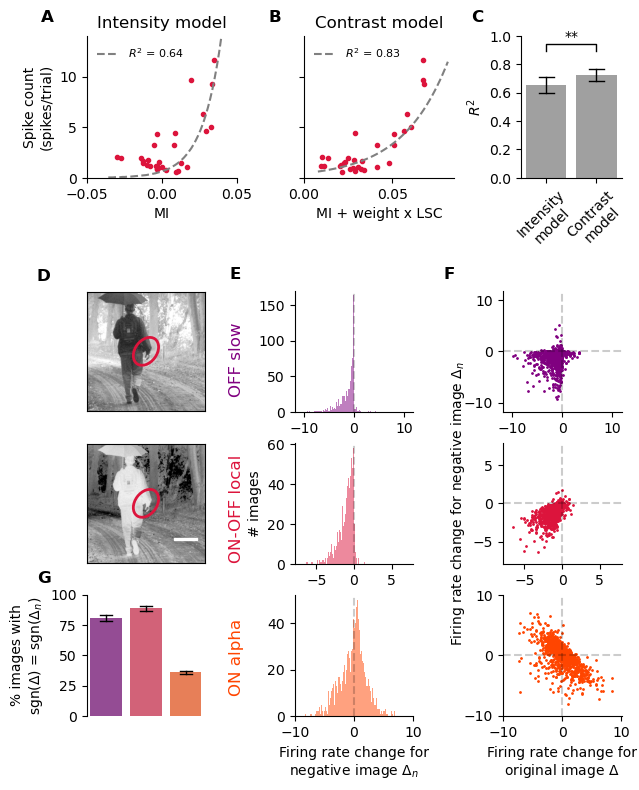

In [17]:
idx_ref = 0
src = 0

fig = figure(figsize=(6.5, 8))
GS = fig.add_gridspec(2, 1, height_ratios = [1,3])

#################################### CONTRAST MODEL ###########################################################

gs = gridspec.GridSpecFromSubplotSpec(1, 3, subplot_spec=GS[0], wspace = 0.5, width_ratios = [3,3,2])

### Example cell
iExp = 2
iCell = 3
print ('Example cell: ', selected_cells_liu_2022[iExp][iCell])
ax = fig.add_subplot(gs[0])
ax.plot(x_LN, spike_counts, '.', color='crimson')
ax.plot(x_vals_LN, predictions_LN, '--', color='grey', label = '$R^2$ = %0.02f'%explained_variance_LN[iExp][iCell])
ax.set_xlabel('MI')
ax.set_ylabel('Spike count\n(spikes/trial)')
ax.set_title('Intensity model')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(frameon=False, fontsize=8)
ax.set_xlim(-0.05, 0.05)
ax.set_ylim(0, 14)
ax.text(-0.05 * 1.6, 14 * 1.1, 'A', color='k', fontsize = 12, weight='bold')

ax = fig.add_subplot(gs[1])
ax.plot(x_LSC, spike_counts, '.', color='crimson')
ax.plot(x_vals_LSC, predictions_LSC, '--',  color='grey' , label = '$R^2$ = %0.02f'%explained_variance_LSC[iExp][iCell])
ax.set_xlabel('MI + weight x LSC')
ax.set_title('Contrast model')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(frameon=False, fontsize=8)
ax.set_xlim(0, None)
ax.set_ylim(0, 14)
ax.set_yticklabels([])
ax.text(-0.02, 14 * 1.1, 'B', color='k', fontsize = 12, weight='bold')

### Population

stacked_lsc_expl_vars = hstack([explained_variance_LSC[0], explained_variance_LSC[1], explained_variance_LSC[2]])
stacked_ln_expl_vars = hstack([explained_variance_LN[0], explained_variance_LN[1], explained_variance_LN[2]])

print ('R2 intensity model', mean(stacked_ln_expl_vars), std(stacked_ln_expl_vars)/sqrt(len(stacked_ln_expl_vars)))
print ('R2 contrast model', mean(stacked_lsc_expl_vars), std(stacked_lsc_expl_vars)/sqrt(len(stacked_lsc_expl_vars)))

ax = fig.add_subplot(gs[2])
ax.set_ylim(0, 1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# p-value
test = wilcoxon(stacked_ln_expl_vars, stacked_lsc_expl_vars)
print ('p-value = ', test[1])
x1, x2 = 0, 1
y, h, col = max(hstack([stacked_ln_expl_vars, stacked_lsc_expl_vars])), 0.05, 'k'
ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c=col)
ax.text((x1+x2)*.5, y+h, str(convert_pvalue_to_stars(test[1])), ha='center', va='bottom', color=col)
# plot
sns.barplot(data = [stacked_ln_expl_vars, stacked_lsc_expl_vars], color = 'grey', alpha = 0.75, \
            errorbar = 'se', errcolor='k', errwidth = 1, capsize = 0.3)
ax.set_xticklabels(['Intensity\nmodel', 'Contrast\nmodel'], rotation=45)
ax.set_ylabel('$R^2$')
ax.text(-1.5, 1.1, 'C', color='k', fontsize = 12, weight='bold')

#################################### NEGATIVE IMAGES ##########################################################

gs = gridspec.GridSpecFromSubplotSpec(3, 3, subplot_spec=GS[1], wspace = 0.75, hspace = 0.25, width_ratios = [3,3,3])

##### OFF slow, cluster 20
print ('OFF slow')
iExp = 2
cell_nb = 20 
index = where(clusters_all_experiments[iExp] == cell_nb)[0][0] 

print (cell_nb)

lim_min = amin(model_spike_counts_all_experiments[iExp][:, 0, -1, src, index] \
               - model_spike_counts_all_experiments[iExp][:, 0, idx_ref, src, index])
lim_max = amax(model_spike_counts_all_experiments[iExp][:, 0, -1, src, index] \
               - model_spike_counts_all_experiments[iExp][:, 0, idx_ref, src, index])
lim = 1.2*max(abs(lim_min), lim_max)

dAct_original = model_spike_counts_all_experiments[iExp][:, 0, -1, src, index] \
                - model_spike_counts_all_experiments[iExp][:, 0, idx_ref, src, index]
dAct_neg = model_spike_counts_all_experiments[iExp][:, 1, -1, src, index] \
                - model_spike_counts_all_experiments[iExp][:, 1, idx_ref, src, index]

### Histo neg
ax = fig.add_subplot(gs[0,1])
ax.axvline(0, color='k',ls='--',alpha=0.2)
ax.hist(dAct_neg, bins=100, alpha=0.5, histtype='stepfilled', color='purple')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlim(-lim, lim)
ax.set_ylim(0, 170)
ax.text(-lim*2.1, 25, 'OFF slow', rotation = 'vertical', color='purple', fontsize = 12)
ax.text(-lim*2.1, 170 * 1.1, 'E', color='k', fontsize = 12, weight='bold')

### Scatter
ax = fig.add_subplot(gs[0,2])
ax.axvline(0, color='k',ls='--',alpha=0.2)
ax.axhline(0, color='k',ls='--',alpha=0.2)
ax.scatter(dAct_original, dAct_neg, s=1, color = 'purple')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlim(-lim, lim)
ax.set_ylim(-lim, lim)
ax.text(-lim*2, lim * 1.2, 'F', color='k', fontsize = 12, weight='bold')

##### ON-OFF local
print ('ON OFF local OS')
iExp = 2
cell_nb = 130
index = where(clusters_all_experiments[iExp] == cell_nb)[0][0]
print (cell_nb)

lim_min = amin(model_spike_counts_all_experiments[iExp][:, 0, -1, src, index] \
               - model_spike_counts_all_experiments[iExp][:, 0, idx_ref, src, index])
lim_max = amax(model_spike_counts_all_experiments[iExp][:, 0, -1, src, index] \
               - model_spike_counts_all_experiments[iExp][:, 0, idx_ref, src, index])
lim = 1.2*max(abs(lim_min), lim_max)

dAct_original = model_spike_counts_all_experiments[iExp][:, 0, -1, src, index] \
                - model_spike_counts_all_experiments[iExp][:, 0, idx_ref, src, index]
dAct_neg = model_spike_counts_all_experiments[iExp][:, 1, -1, src, index] \
                - model_spike_counts_all_experiments[iExp][:, 1, idx_ref, src, index]

### Histo neg
ax = fig.add_subplot(gs[1,1])
ax.axvline(0, color='k',ls='--', alpha=0.2)
ax.hist(dAct_neg, bins=100, alpha=0.5, histtype='stepfilled', color='crimson') #alpha=0.75, color = 'C0')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlim(-lim, lim)
ax.set_ylabel('# images')
ax.text(-lim*2.1, 2, 'ON-OFF local', rotation = 'vertical', color='crimson', fontsize = 12)

### Scatter
ax = fig.add_subplot(gs[1,2])
ax.axvline(0, color='k',ls='--',alpha=0.2)
ax.axhline(0, color='k',ls='--',alpha=0.2)
ax.scatter(dAct_original, dAct_neg, s=1, color = 'crimson')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlim(-lim, lim)
ax.set_ylim(-lim, lim)
ax.set_ylabel('Firing rate change for negative image $\Delta_n$')

##### ON alpha, cluster 449
print ('ON alpha')
iExp = 2
cell_nb = 435 
index = where(clusters_all_experiments[iExp] == cell_nb)[0][0] 

print (cell_nb)

lim_min = amin(model_spike_counts_all_experiments[iExp][:, 0, -1, src, index] \
               - model_spike_counts_all_experiments[iExp][:, 0, idx_ref, src, index])
lim_max = amax(model_spike_counts_all_experiments[iExp][:, 0, -1, src, index] \
               - model_spike_counts_all_experiments[iExp][:, 0, idx_ref, src, index])
lim = 1.2*max(abs(lim_min), lim_max)

dAct_original = model_spike_counts_all_experiments[iExp][:, 0, -1, src, index] \
                - model_spike_counts_all_experiments[iExp][:, 0, idx_ref, src, index]
dAct_neg = model_spike_counts_all_experiments[iExp][:, 1, -1, src, index] \
                - model_spike_counts_all_experiments[iExp][:, 1, idx_ref, src, index]

### Histo neg
ax = fig.add_subplot(gs[2,1])
ax.axvline(0, color='k',ls='--',alpha=0.2)
ax.hist(dAct_neg, bins=100, alpha=0.5, histtype='stepfilled', color='orangered')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlim(-lim, lim)
ax.set_xlabel('Firing rate change for\nnegative image $\Delta_n$')
ax.text(-lim*2.1, 10, 'ON alpha', rotation = 'vertical', color='orangered', fontsize = 12)

### Scatter
ax = fig.add_subplot(gs[2,2])
ax.axvline(0, color='k',ls='--',alpha=0.2)
ax.axhline(0, color='k',ls='--',alpha=0.2)
ax.scatter(dAct_original, dAct_neg, s=1, color = 'orangered')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlim(-lim, lim)
ax.set_ylim(-lim, lim)
ax.set_xlabel('Firing rate change for\noriginal image $\Delta$')

# Barplots
ax = fig.add_subplot(gs[2,0])
ax.set_ylim(0, 100)
ax.set_ylabel('% images with\nsgn($\Delta$) = sgn($\Delta_n$)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
sns.barplot(data = [prop_same_sign_slow[src], prop_same_sign_local[src], prop_same_sign_alpha[src]],\
              palette=['purple', 'crimson','orangered'], alpha = 0.75, errorbar = 'se', errcolor='k', errwidth = 1, capsize = 0.3)
ax.set_xticklabels([])
ax.set_xticks([])
ax.text(-1.75, 110, 'G', color='k', fontsize = 12, weight='bold')

#################################### IMAGES ###################################################################

cell = 130 #20
print ('Example cell:', cell)
ellipsepoints = ellipse_data_2s[cell]['ellipse_points']
x0, y0, width, height, angle = ellipse_data_2s[cell]['ellipse_parameters']

iImg = 2
ax = fig.add_subplot(gs[0,0])
img = imread(path_to_original_images + 'image_' + images[iImg] + '_image.png')
ax.imshow(img, cmap='Greys_r')
ellipse = pcs.Ellipse((x0,y0), width, height, angle=angle, fill=False, color='crimson',lw=2)
ax.add_artist(ellipse)
ax.set_yticks([])
ax.set_xticks([])
ax.set_xlim(x0-150,x0+150)
ax.set_ylim(y0+150,y0-150)
ax.text(185, 340, 'D', color='k', fontsize = 12, weight='bold')

ax = fig.add_subplot(gs[1,0])
img = imread(path_to_original_images + 'image_' + images[iImg] + '_image.png')
ax.imshow(img, cmap='Greys')
ellipse = pcs.Ellipse((x0,y0), width, height, angle=angle, fill=False, color='crimson',lw=2)
ax.add_artist(ellipse)
ax.set_xlim(x0-150,x0+150)
ax.set_ylim(y0+150,y0-150)
ax.set_yticks([])
ax.set_xticks([])
scalebar = AnchoredSizeBar(ax.transData, 57.14, '', 'lower right', pad=0.5, color='white',frameon=False, sep=0, \
                   size_vertical=5)
ax.add_artist(scalebar)

tight_layout()

### Save figure
fig_path = 'T:/Documents/Papier defocus/figures/papier/'
fsave = fig_path 
# fig.savefig(fsave+'Fig4.png', format='png', dpi=300)
# fig.savefig(fsave+'Fig4.pdf', format='pdf', dpi=300)
# fig.savefig(fsave+'Fig4.eps', format='eps')

# Supp figure: peripheral retina

### V2

OFF slow
20
ON OFF local OS
130
ON alpha
435
Example cell: 130


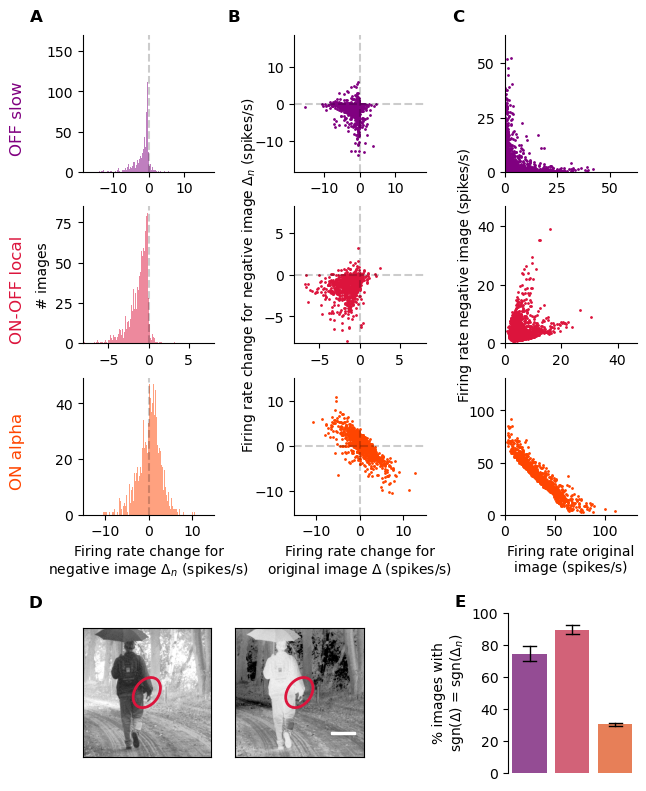

In [21]:
idx_ref = 0
src = 2

fig = figure(figsize=(6.5, 8))
GS = fig.add_gridspec(2, 1, height_ratios = [3,1])

#################################### NEGATIVE IMAGES ##########################################################

gs = gridspec.GridSpecFromSubplotSpec(3, 3, subplot_spec=GS[0], wspace = 0.6, hspace = 0.25, width_ratios = [3,3,3])

##### OFF slow, cluster 20
print ('OFF slow')
iExp = 2
cell_nb = 20 
index = where(clusters_all_experiments[iExp] == cell_nb)[0][0] 

print (cell_nb)

lim_min = amin(model_spike_counts_all_experiments[iExp][:, 0, -1, src, index] \
               - model_spike_counts_all_experiments[iExp][:, 0, idx_ref, src, index])
lim_max = amax(model_spike_counts_all_experiments[iExp][:, 0, -1, src, index] \
               - model_spike_counts_all_experiments[iExp][:, 0, idx_ref, src, index])
lim = 1.2*max(abs(lim_min), lim_max)

dAct_original = model_spike_counts_all_experiments[iExp][:, 0, -1, src, index] \
                - model_spike_counts_all_experiments[iExp][:, 0, idx_ref, src, index]
dAct_neg = model_spike_counts_all_experiments[iExp][:, 1, -1, src, index] \
                - model_spike_counts_all_experiments[iExp][:, 1, idx_ref, src, index]

### Histo neg
ax = fig.add_subplot(gs[0,0])
ax.axvline(0, color='k',ls='--',alpha=0.2)
ax.hist(dAct_neg, bins=100, alpha=0.5, histtype='stepfilled', color='purple')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlim(-lim, lim)
ax.set_ylim(0, 170)
ax.text(-lim*2.1, 25, 'OFF slow', rotation = 'vertical', color='purple', fontsize = 12)
ax.text(-lim*1.8, 170 * 1.1, 'A', color='k', fontsize = 12, weight='bold')

### Scatter delta 
ax = fig.add_subplot(gs[0,1])
ax.axvline(0, color='k',ls='--',alpha=0.2)
ax.axhline(0, color='k',ls='--',alpha=0.2)
ax.scatter(dAct_original, dAct_neg, s=1, color = 'purple')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlim(-lim, lim)
ax.set_ylim(-lim, lim)
ax.text(-lim*2, lim * 1.2, 'B', color='k', fontsize = 12, weight='bold')

### Scatter
idx_scatter = 4
lim = 1.2*amax(model_spike_counts_all_experiments[iExp][:, :, idx_scatter, src, index])
ax = fig.add_subplot(gs[0,2])
ax.scatter(model_spike_counts_all_experiments[iExp][:, 0, idx_scatter, src, index], \
           model_spike_counts_all_experiments[iExp][:, 1, idx_scatter, src, index],\
            s=1, color = 'purple')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlim(0, lim)
ax.set_ylim(0, lim)
ax.set_xticks([0,25,50])
ax.set_yticks([0,25,50])
ax.text(-lim*0.4, lim * 1.1, 'C', color='k', fontsize = 12, weight='bold')

##### ON-OFF local
print ('ON OFF local OS')
iExp = 2
cell_nb = 130
index = where(clusters_all_experiments[iExp] == cell_nb)[0][0]
print (cell_nb)

lim_min = amin(model_spike_counts_all_experiments[iExp][:, 0, -1, src, index] \
               - model_spike_counts_all_experiments[iExp][:, 0, idx_ref, src, index])
lim_max = amax(model_spike_counts_all_experiments[iExp][:, 0, -1, src, index] \
               - model_spike_counts_all_experiments[iExp][:, 0, idx_ref, src, index])
lim = 1.2*max(abs(lim_min), lim_max)

dAct_original = model_spike_counts_all_experiments[iExp][:, 0, -1, src, index] \
                - model_spike_counts_all_experiments[iExp][:, 0, idx_ref, src, index]
dAct_neg = model_spike_counts_all_experiments[iExp][:, 1, -1, src, index] \
                - model_spike_counts_all_experiments[iExp][:, 1, idx_ref, src, index]

### Histo neg
ax = fig.add_subplot(gs[1,0])
ax.axvline(0, color='k',ls='--', alpha=0.2)
ax.hist(dAct_neg, bins=100, alpha=0.5, histtype='stepfilled', color='crimson') #alpha=0.75, color = 'C0')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlim(-lim, lim)
ax.set_ylabel('# images')
ax.text(-lim*2.1, 2, 'ON-OFF local', rotation = 'vertical', color='crimson', fontsize = 12)

### Scatter Delta
ax = fig.add_subplot(gs[1,1])
ax.axvline(0, color='k',ls='--',alpha=0.2)
ax.axhline(0, color='k',ls='--',alpha=0.2)
ax.scatter(dAct_original, dAct_neg, s=1, color = 'crimson')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlim(-lim, lim)
ax.set_ylim(-lim, lim)
ax.set_ylabel('Firing rate change for negative image $\Delta_n$ (spikes/s)')

### Scatter
idx_scatter = 4
lim = 1.2*amax(model_spike_counts_all_experiments[iExp][:, :, idx_scatter, src, index])
ax = fig.add_subplot(gs[1,2])
# ax.plot([0,lim*0.8], [0,lim*0.8], color='k', ls='--',alpha=0.2)
ax.scatter(model_spike_counts_all_experiments[iExp][:, 0, idx_scatter, src, index], \
           model_spike_counts_all_experiments[iExp][:, 1, idx_scatter, src, index],\
            s=1, color = 'crimson')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlim(0, lim)
ax.set_ylim(0, lim)
ax.set_ylabel('Firing rate negative image (spikes/s)')

##### ON alpha, cluster 449
print ('ON alpha')
iExp = 2
cell_nb = 435 
index = where(clusters_all_experiments[iExp] == cell_nb)[0][0] 

print (cell_nb)

lim_min = amin(model_spike_counts_all_experiments[iExp][:, 0, -1, src, index] \
               - model_spike_counts_all_experiments[iExp][:, 0, idx_ref, src, index])
lim_max = amax(model_spike_counts_all_experiments[iExp][:, 0, -1, src, index] \
               - model_spike_counts_all_experiments[iExp][:, 0, idx_ref, src, index])
lim = 1.2*max(abs(lim_min), lim_max)

dAct_original = model_spike_counts_all_experiments[iExp][:, 0, -1, src, index] \
                - model_spike_counts_all_experiments[iExp][:, 0, idx_ref, src, index]
dAct_neg = model_spike_counts_all_experiments[iExp][:, 1, -1, src, index] \
                - model_spike_counts_all_experiments[iExp][:, 1, idx_ref, src, index]

### Histo neg
ax = fig.add_subplot(gs[2,0])
ax.axvline(0, color='k',ls='--',alpha=0.2)
ax.hist(dAct_neg, bins=100, alpha=0.5, histtype='stepfilled', color='orangered')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlim(-lim, lim)
ax.set_xlabel('Firing rate change for\nnegative image $\Delta_n$ (spikes/s)')
ax.text(-lim*2.1, 10, 'ON alpha', rotation = 'vertical', color='orangered', fontsize = 12)

### Scatter delta
ax = fig.add_subplot(gs[2,1])
ax.axvline(0, color='k',ls='--',alpha=0.2)
ax.axhline(0, color='k',ls='--',alpha=0.2)
ax.scatter(dAct_original, dAct_neg, s=1, color = 'orangered')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlim(-lim, lim)
ax.set_ylim(-lim, lim)
ax.set_xlabel('Firing rate change for\noriginal image $\Delta$ (spikes/s)')

### Scatter
idx_scatter = 4
lim = 1.2*amax(model_spike_counts_all_experiments[iExp][:, :, idx_scatter, src, index])
ax = fig.add_subplot(gs[2,2])
# ax.plot([0,lim*0.8], [0,lim*0.8], color='k', ls='--',alpha=0.2)
ax.scatter(model_spike_counts_all_experiments[iExp][:, 0, idx_scatter, src, index], \
           model_spike_counts_all_experiments[iExp][:, 1, idx_scatter, src, index],\
            s=1, color = 'orangered')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlim(0, lim)
ax.set_ylim(0, lim)
ax.set_xlabel('Firing rate original\nimage (spikes/s)')

#################################### IMAGES ###################################################################

gs = gridspec.GridSpecFromSubplotSpec(1, 4, subplot_spec=GS[1], wspace = 0.2, hspace = 0, width_ratios = [2,2,1.5,2])

cell = 130 #20
print ('Example cell:', cell)
ellipsepoints = ellipse_data_2s[cell]['ellipse_points']
x0, y0, width, height, angle = ellipse_data_2s[cell]['ellipse_parameters']

iImg = 2
ax = fig.add_subplot(gs[0])
img = imread(path_to_original_images + 'image_' + images[iImg] + '_image.png')
ax.imshow(img, cmap='Greys_r')
ellipse = pcs.Ellipse((x0,y0), width, height, angle=angle, fill=False, color='crimson',lw=2)
ax.add_artist(ellipse)
ax.set_yticks([])
ax.set_xticks([])
ax.set_xlim(x0-150,x0+150)
ax.set_ylim(y0+150,y0-150)
ax.text(185, 320, 'D', color='k', fontsize = 12, weight='bold')

ax = fig.add_subplot(gs[1])
img = imread(path_to_original_images + 'image_' + images[iImg] + '_image.png')
ax.imshow(img, cmap='Greys')
ellipse = pcs.Ellipse((x0,y0), width, height, angle=angle, fill=False, color='crimson',lw=2)
ax.add_artist(ellipse)
ax.set_xlim(x0-150,x0+150)
ax.set_ylim(y0+150,y0-150)
ax.set_yticks([])
ax.set_xticks([])
scalebar = AnchoredSizeBar(ax.transData, 57.14, '', 'lower right', pad=0.5, color='white',frameon=False, sep=0, \
                   size_vertical=5)
ax.add_artist(scalebar)

# Barplots
ax = fig.add_subplot(gs[3])
ax.set_ylim(0, 100)
ax.set_ylabel('% images with\nsgn($\Delta$) = sgn($\Delta_n$)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
sns.barplot(data = [prop_same_sign_slow[int(src/2)], prop_same_sign_local[int(src/2)], prop_same_sign_alpha[int(src/2)]],\
              palette=['purple', 'crimson','orangered'], alpha = 0.75, errorbar = 'se', errcolor='k', errwidth = 1, capsize = 0.3)
ax.set_xticklabels([])
ax.set_xticks([])
ax.text(-1.75, 104, 'E', color='k', fontsize = 12, weight='bold')

tight_layout()

### Save figure
fig_path = 'T:/Documents/Papier defocus/figures/papier/'
fig.savefig(fig_path + 'Supp_fig_Fig4_v2.png', format='png', dpi=300)# fig.savefig(fsave+'Fig4_v2.png', format='png', dpi=300)

### V1

OFF slow
20
ON OFF local OS
130
ON alpha
435
Example cell: 130


C:\Users\Sarah\AppData\Local\Temp\ipykernel_11372\2617994314.py:174: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  tight_layout()


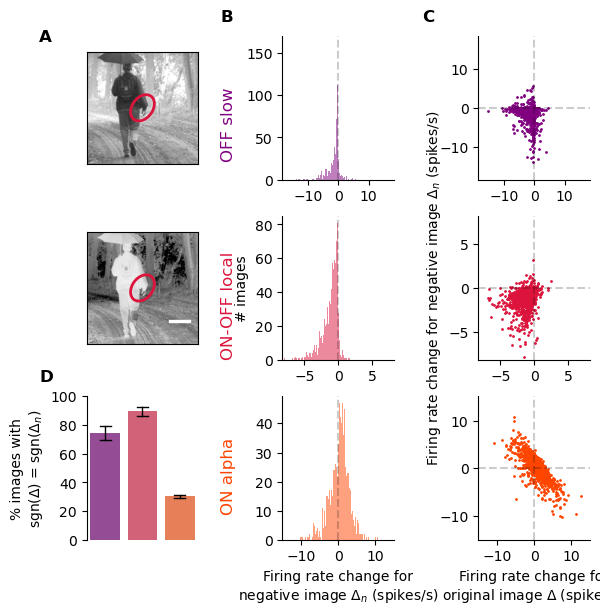

In [ ]:
idx_ref = 0
src = 2

fig = figure(figsize=(6.5, 6.55))
gs = fig.add_gridspec(3, 3, wspace = 0.75, hspace = 0.25, width_ratios = [3,3,3])

#################################### NEGATIVE IMAGES ##########################################################

##### OFF slow, cluster 20
print ('OFF slow')
iExp = 2
cell_nb = 20 
index = where(clusters_all_experiments[iExp] == cell_nb)[0][0] 

print (cell_nb)

lim_min = amin(model_spike_counts_all_experiments[iExp][:, 0, -1, src, index] \
               - model_spike_counts_all_experiments[iExp][:, 0, idx_ref, src, index])
lim_max = amax(model_spike_counts_all_experiments[iExp][:, 0, -1, src, index] \
               - model_spike_counts_all_experiments[iExp][:, 0, idx_ref, src, index])
lim = 1.2*max(abs(lim_min), lim_max)

dAct_original = model_spike_counts_all_experiments[iExp][:, 0, -1, src, index] \
                - model_spike_counts_all_experiments[iExp][:, 0, idx_ref, src, index]
dAct_neg = model_spike_counts_all_experiments[iExp][:, 1, -1, src, index] \
                - model_spike_counts_all_experiments[iExp][:, 1, idx_ref, src, index]

### Histo neg
ax = fig.add_subplot(gs[0,1])
ax.axvline(0, color='k',ls='--',alpha=0.2)
ax.hist(dAct_neg, bins=100, alpha=0.5, histtype='stepfilled', color='purple')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlim(-lim, lim)
ax.set_ylim(0, 170)
ax.text(-lim*2.1, 25, 'OFF slow', rotation = 'vertical', color='purple', fontsize = 12)
ax.text(-lim*2.1, 170 * 1.1, 'B', color='k', fontsize = 12, weight='bold')

### Scatter
ax = fig.add_subplot(gs[0,2])
ax.axvline(0, color='k',ls='--',alpha=0.2)
ax.axhline(0, color='k',ls='--',alpha=0.2)
ax.scatter(dAct_original, dAct_neg, s=1, color = 'purple')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlim(-lim, lim)
ax.set_ylim(-lim, lim)
ax.text(-lim*2, lim * 1.2, 'C', color='k', fontsize = 12, weight='bold')

##### ON-OFF local
print ('ON OFF local OS')
iExp = 2
cell_nb = 130
index = where(clusters_all_experiments[iExp] == cell_nb)[0][0]
print (cell_nb)

lim_min = amin(model_spike_counts_all_experiments[iExp][:, 0, -1, src, index] \
               - model_spike_counts_all_experiments[iExp][:, 0, idx_ref, src, index])
lim_max = amax(model_spike_counts_all_experiments[iExp][:, 0, -1, src, index] \
               - model_spike_counts_all_experiments[iExp][:, 0, idx_ref, src, index])
lim = 1.2*max(abs(lim_min), lim_max)

dAct_original = model_spike_counts_all_experiments[iExp][:, 0, -1, src, index] \
                - model_spike_counts_all_experiments[iExp][:, 0, idx_ref, src, index]
dAct_neg = model_spike_counts_all_experiments[iExp][:, 1, -1, src, index] \
                - model_spike_counts_all_experiments[iExp][:, 1, idx_ref, src, index]

### Histo neg
ax = fig.add_subplot(gs[1,1])
ax.axvline(0, color='k',ls='--', alpha=0.2)
ax.hist(dAct_neg, bins=100, alpha=0.5, histtype='stepfilled', color='crimson') #alpha=0.75, color = 'C0')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlim(-lim, lim)
ax.set_ylabel('# images')
ax.text(-lim*2.1, 2, 'ON-OFF local', rotation = 'vertical', color='crimson', fontsize = 12)

### Scatter
ax = fig.add_subplot(gs[1,2])
ax.axvline(0, color='k',ls='--',alpha=0.2)
ax.axhline(0, color='k',ls='--',alpha=0.2)
ax.scatter(dAct_original, dAct_neg, s=1, color = 'crimson')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlim(-lim, lim)
ax.set_ylim(-lim, lim)
ax.set_ylabel('Firing rate change for negative image $\Delta_n$')

##### ON alpha, cluster 449
print ('ON alpha')
iExp = 2
cell_nb = 435 
index = where(clusters_all_experiments[iExp] == cell_nb)[0][0] 

print (cell_nb)

lim_min = amin(model_spike_counts_all_experiments[iExp][:, 0, -1, src, index] \
               - model_spike_counts_all_experiments[iExp][:, 0, idx_ref, src, index])
lim_max = amax(model_spike_counts_all_experiments[iExp][:, 0, -1, src, index] \
               - model_spike_counts_all_experiments[iExp][:, 0, idx_ref, src, index])
lim = 1.2*max(abs(lim_min), lim_max)

dAct_original = model_spike_counts_all_experiments[iExp][:, 0, -1, src, index] \
                - model_spike_counts_all_experiments[iExp][:, 0, idx_ref, src, index]
dAct_neg = model_spike_counts_all_experiments[iExp][:, 1, -1, src, index] \
                - model_spike_counts_all_experiments[iExp][:, 1, idx_ref, src, index]

### Histo neg
ax = fig.add_subplot(gs[2,1])
ax.axvline(0, color='k',ls='--',alpha=0.2)
ax.hist(dAct_neg, bins=100, alpha=0.5, histtype='stepfilled', color='orangered')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlim(-lim, lim)
ax.set_xlabel('Firing rate change for\nnegative image $\Delta_n$')
ax.text(-lim*2.1, 10, 'ON alpha', rotation = 'vertical', color='orangered', fontsize = 12)

### Scatter
ax = fig.add_subplot(gs[2,2])
ax.axvline(0, color='k',ls='--',alpha=0.2)
ax.axhline(0, color='k',ls='--',alpha=0.2)
ax.scatter(dAct_original, dAct_neg, s=1, color = 'orangered')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlim(-lim, lim)
ax.set_ylim(-lim, lim)
ax.set_xlabel('Firing rate change for\noriginal image $\Delta$')

# Barplots
ax = fig.add_subplot(gs[2,0])
ax.set_ylim(0, 100)
ax.set_ylabel('% images with\nsgn($\Delta$) = sgn($\Delta_n$)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
sns.barplot(data = [prop_same_sign_slow[int(src/2)], prop_same_sign_local[int(src/2)], prop_same_sign_alpha[int(src/2)]],\
              palette=['purple', 'crimson','orangered'], alpha = 0.75, errorbar = 'se', errcolor='k', errwidth = 1, capsize = 0.3)
ax.set_xticklabels([])
ax.set_xticks([])
ax.text(-1.75, 110, 'D', color='k', fontsize = 12, weight='bold')

#################################### IMAGES ###################################################################

cell = 130 #20
print ('Example cell:', cell)
ellipsepoints = ellipse_data_2s[cell]['ellipse_points']
x0, y0, width, height, angle = ellipse_data_2s[cell]['ellipse_parameters']

iImg = 2
ax = fig.add_subplot(gs[0,0])
img = imread(path_to_original_images + 'image_' + images[iImg] + '_image.png')
ax.imshow(img, cmap='Greys_r')
ellipse = pcs.Ellipse((x0,y0), width, height, angle=angle, fill=False, color='crimson',lw=2)
ax.add_artist(ellipse)
ax.set_yticks([])
ax.set_xticks([])
ax.set_xlim(x0-150,x0+150)
ax.set_ylim(y0+150,y0-150)
ax.text(185, 340, 'A', color='k', fontsize = 12, weight='bold')

ax = fig.add_subplot(gs[1,0])
img = imread(path_to_original_images + 'image_' + images[iImg] + '_image.png')
ax.imshow(img, cmap='Greys')
ellipse = pcs.Ellipse((x0,y0), width, height, angle=angle, fill=False, color='crimson',lw=2)
ax.add_artist(ellipse)
ax.set_xlim(x0-150,x0+150)
ax.set_ylim(y0+150,y0-150)
ax.set_yticks([])
ax.set_xticks([])
scalebar = AnchoredSizeBar(ax.transData, 57.14, '', 'lower right', pad=0.5, color='white',frameon=False, sep=0, \
                   size_vertical=5)
ax.add_artist(scalebar)

tight_layout()

### Save figure
fsave = '/home/sarah/Documents/Myopia/Documents/Papier defocus/figures/papier/'
# fig.savefig(fsave+'Supp_fig_Fig4.png', format='png', dpi=300)

OFF slow
20
ON OFF local OS
130
ON alpha
435
Example cell: 130


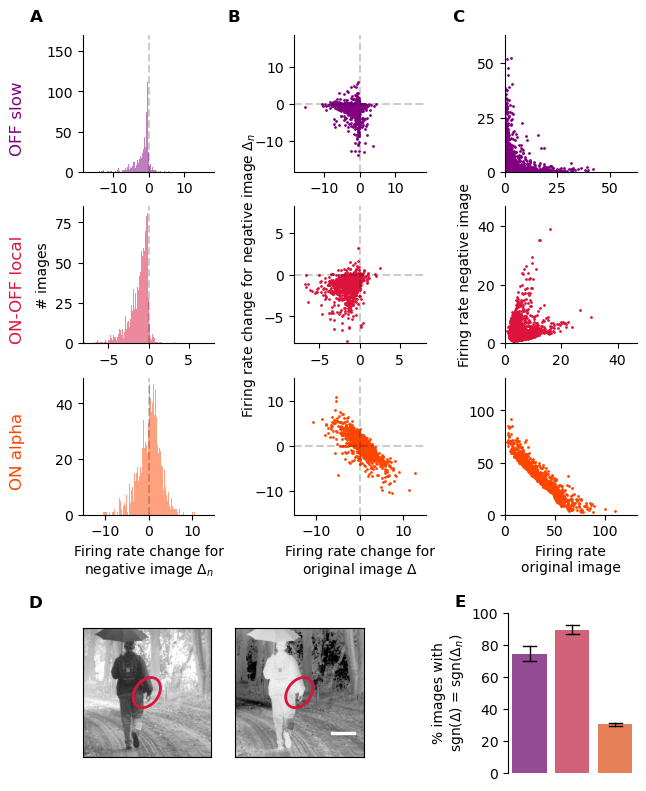

In [19]:
idx_ref = 0
src = 2

fig = figure(figsize=(6.5, 8))
GS = fig.add_gridspec(2, 1, height_ratios = [3,1])

#################################### NEGATIVE IMAGES ##########################################################

gs = gridspec.GridSpecFromSubplotSpec(3, 3, subplot_spec=GS[0], wspace = 0.6, hspace = 0.25, width_ratios = [3,3,3])

##### OFF slow, cluster 20
print ('OFF slow')
iExp = 2
cell_nb = 20 
index = where(clusters_all_experiments[iExp] == cell_nb)[0][0] 

print (cell_nb)

lim_min = amin(model_spike_counts_all_experiments[iExp][:, 0, -1, src, index] \
               - model_spike_counts_all_experiments[iExp][:, 0, idx_ref, src, index])
lim_max = amax(model_spike_counts_all_experiments[iExp][:, 0, -1, src, index] \
               - model_spike_counts_all_experiments[iExp][:, 0, idx_ref, src, index])
lim = 1.2*max(abs(lim_min), lim_max)

dAct_original = model_spike_counts_all_experiments[iExp][:, 0, -1, src, index] \
                - model_spike_counts_all_experiments[iExp][:, 0, idx_ref, src, index]
dAct_neg = model_spike_counts_all_experiments[iExp][:, 1, -1, src, index] \
                - model_spike_counts_all_experiments[iExp][:, 1, idx_ref, src, index]

### Histo neg
ax = fig.add_subplot(gs[0,0])
ax.axvline(0, color='k',ls='--',alpha=0.2)
ax.hist(dAct_neg, bins=100, alpha=0.5, histtype='stepfilled', color='purple')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlim(-lim, lim)
ax.set_ylim(0, 170)
ax.text(-lim*2.1, 25, 'OFF slow', rotation = 'vertical', color='purple', fontsize = 12)
ax.text(-lim*1.8, 170 * 1.1, 'A', color='k', fontsize = 12, weight='bold')

### Scatter delta 
ax = fig.add_subplot(gs[0,1])
ax.axvline(0, color='k',ls='--',alpha=0.2)
ax.axhline(0, color='k',ls='--',alpha=0.2)
ax.scatter(dAct_original, dAct_neg, s=1, color = 'purple')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlim(-lim, lim)
ax.set_ylim(-lim, lim)
ax.text(-lim*2, lim * 1.2, 'B', color='k', fontsize = 12, weight='bold')

### Scatter
idx_scatter = 4
lim = 1.2*amax(model_spike_counts_all_experiments[iExp][:, :, idx_scatter, src, index])
ax = fig.add_subplot(gs[0,2])
ax.scatter(model_spike_counts_all_experiments[iExp][:, 0, idx_scatter, src, index], \
           model_spike_counts_all_experiments[iExp][:, 1, idx_scatter, src, index],\
            s=1, color = 'purple')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlim(0, lim)
ax.set_ylim(0, lim)
ax.set_xticks([0,25,50])
ax.set_yticks([0,25,50])
ax.text(-lim*0.4, lim * 1.1, 'C', color='k', fontsize = 12, weight='bold')

##### ON-OFF local
print ('ON OFF local OS')
iExp = 2
cell_nb = 130
index = where(clusters_all_experiments[iExp] == cell_nb)[0][0]
print (cell_nb)

lim_min = amin(model_spike_counts_all_experiments[iExp][:, 0, -1, src, index] \
               - model_spike_counts_all_experiments[iExp][:, 0, idx_ref, src, index])
lim_max = amax(model_spike_counts_all_experiments[iExp][:, 0, -1, src, index] \
               - model_spike_counts_all_experiments[iExp][:, 0, idx_ref, src, index])
lim = 1.2*max(abs(lim_min), lim_max)

dAct_original = model_spike_counts_all_experiments[iExp][:, 0, -1, src, index] \
                - model_spike_counts_all_experiments[iExp][:, 0, idx_ref, src, index]
dAct_neg = model_spike_counts_all_experiments[iExp][:, 1, -1, src, index] \
                - model_spike_counts_all_experiments[iExp][:, 1, idx_ref, src, index]

### Histo neg
ax = fig.add_subplot(gs[1,0])
ax.axvline(0, color='k',ls='--', alpha=0.2)
ax.hist(dAct_neg, bins=100, alpha=0.5, histtype='stepfilled', color='crimson') #alpha=0.75, color = 'C0')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlim(-lim, lim)
ax.set_ylabel('# images')
ax.text(-lim*2.1, 2, 'ON-OFF local', rotation = 'vertical', color='crimson', fontsize = 12)

### Scatter Delta
ax = fig.add_subplot(gs[1,1])
ax.axvline(0, color='k',ls='--',alpha=0.2)
ax.axhline(0, color='k',ls='--',alpha=0.2)
ax.scatter(dAct_original, dAct_neg, s=1, color = 'crimson')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlim(-lim, lim)
ax.set_ylim(-lim, lim)
ax.set_ylabel('Firing rate change for negative image $\Delta_n$')

### Scatter
idx_scatter = 4
lim = 1.2*amax(model_spike_counts_all_experiments[iExp][:, :, idx_scatter, src, index])
ax = fig.add_subplot(gs[1,2])
# ax.plot([0,lim*0.8], [0,lim*0.8], color='k', ls='--',alpha=0.2)
ax.scatter(model_spike_counts_all_experiments[iExp][:, 0, idx_scatter, src, index], \
           model_spike_counts_all_experiments[iExp][:, 1, idx_scatter, src, index],\
            s=1, color = 'crimson')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlim(0, lim)
ax.set_ylim(0, lim)
ax.set_ylabel('Firing rate negative image')

##### ON alpha, cluster 449
print ('ON alpha')
iExp = 2
cell_nb = 435 
index = where(clusters_all_experiments[iExp] == cell_nb)[0][0] 

print (cell_nb)

lim_min = amin(model_spike_counts_all_experiments[iExp][:, 0, -1, src, index] \
               - model_spike_counts_all_experiments[iExp][:, 0, idx_ref, src, index])
lim_max = amax(model_spike_counts_all_experiments[iExp][:, 0, -1, src, index] \
               - model_spike_counts_all_experiments[iExp][:, 0, idx_ref, src, index])
lim = 1.2*max(abs(lim_min), lim_max)

dAct_original = model_spike_counts_all_experiments[iExp][:, 0, -1, src, index] \
                - model_spike_counts_all_experiments[iExp][:, 0, idx_ref, src, index]
dAct_neg = model_spike_counts_all_experiments[iExp][:, 1, -1, src, index] \
                - model_spike_counts_all_experiments[iExp][:, 1, idx_ref, src, index]

### Histo neg
ax = fig.add_subplot(gs[2,0])
ax.axvline(0, color='k',ls='--',alpha=0.2)
ax.hist(dAct_neg, bins=100, alpha=0.5, histtype='stepfilled', color='orangered')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlim(-lim, lim)
ax.set_xlabel('Firing rate change for\nnegative image $\Delta_n$')
ax.text(-lim*2.1, 10, 'ON alpha', rotation = 'vertical', color='orangered', fontsize = 12)

### Scatter delta
ax = fig.add_subplot(gs[2,1])
ax.axvline(0, color='k',ls='--',alpha=0.2)
ax.axhline(0, color='k',ls='--',alpha=0.2)
ax.scatter(dAct_original, dAct_neg, s=1, color = 'orangered')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlim(-lim, lim)
ax.set_ylim(-lim, lim)
ax.set_xlabel('Firing rate change for\noriginal image $\Delta$')

### Scatter
idx_scatter = 4
lim = 1.2*amax(model_spike_counts_all_experiments[iExp][:, :, idx_scatter, src, index])
ax = fig.add_subplot(gs[2,2])
# ax.plot([0,lim*0.8], [0,lim*0.8], color='k', ls='--',alpha=0.2)
ax.scatter(model_spike_counts_all_experiments[iExp][:, 0, idx_scatter, src, index], \
           model_spike_counts_all_experiments[iExp][:, 1, idx_scatter, src, index],\
            s=1, color = 'orangered')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlim(0, lim)
ax.set_ylim(0, lim)
ax.set_xlabel('Firing rate\noriginal image')

#################################### IMAGES ###################################################################

gs = gridspec.GridSpecFromSubplotSpec(1, 4, subplot_spec=GS[1], wspace = 0.2, hspace = 0, width_ratios = [2,2,1.5,2])

cell = 130 #20
print ('Example cell:', cell)
ellipsepoints = ellipse_data_2s[cell]['ellipse_points']
x0, y0, width, height, angle = ellipse_data_2s[cell]['ellipse_parameters']

iImg = 2
ax = fig.add_subplot(gs[0])
img = imread(path_to_original_images + 'image_' + images[iImg] + '_image.png')
ax.imshow(img, cmap='Greys_r')
ellipse = pcs.Ellipse((x0,y0), width, height, angle=angle, fill=False, color='crimson',lw=2)
ax.add_artist(ellipse)
ax.set_yticks([])
ax.set_xticks([])
ax.set_xlim(x0-150,x0+150)
ax.set_ylim(y0+150,y0-150)
ax.text(185, 320, 'D', color='k', fontsize = 12, weight='bold')

ax = fig.add_subplot(gs[1])
img = imread(path_to_original_images + 'image_' + images[iImg] + '_image.png')
ax.imshow(img, cmap='Greys')
ellipse = pcs.Ellipse((x0,y0), width, height, angle=angle, fill=False, color='crimson',lw=2)
ax.add_artist(ellipse)
ax.set_xlim(x0-150,x0+150)
ax.set_ylim(y0+150,y0-150)
ax.set_yticks([])
ax.set_xticks([])
scalebar = AnchoredSizeBar(ax.transData, 57.14, '', 'lower right', pad=0.5, color='white',frameon=False, sep=0, \
                   size_vertical=5)
ax.add_artist(scalebar)

# Barplots
ax = fig.add_subplot(gs[3])
ax.set_ylim(0, 100)
ax.set_ylabel('% images with\nsgn($\Delta$) = sgn($\Delta_n$)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
sns.barplot(data = [prop_same_sign_slow[int(src/2)], prop_same_sign_local[int(src/2)], prop_same_sign_alpha[int(src/2)]],\
              palette=['purple', 'crimson','orangered'], alpha = 0.75, errorbar = 'se', errcolor='k', errwidth = 1, capsize = 0.3)
ax.set_xticklabels([])
ax.set_xticks([])
ax.text(-1.75, 104, 'E', color='k', fontsize = 12, weight='bold')

tight_layout()

### Save figure
# fig_path = 'T:/Documents/Papier defocus/figures/papier/'
# fig.savefig(fsave+'Supp_fig_Fig4_v2.png', format='png', dpi=300)# fig.savefig(fsave+'Fig4_v2.png', format='png', dpi=300)

# Supp figure: correlation in sharp images

OFF slow
20
ON OFF local OS
130
ON alpha
435


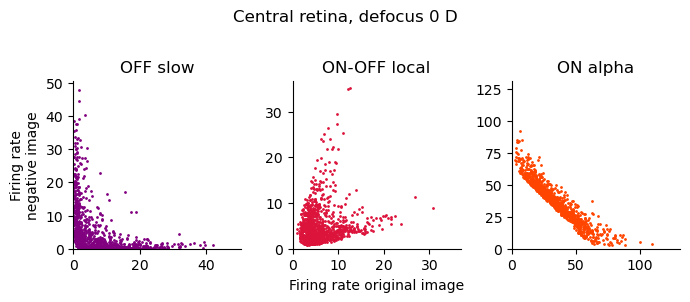

In [20]:
idx_ref = 4
src = 2

fig = figure(figsize=(7, 3))
fig.suptitle('Central retina, defocus 0 D')
gs = fig.add_gridspec(1, 3,)

##### OFF slow, cluster 20
print ('OFF slow')
iExp = 2
cell_nb = 20 
index = where(clusters_all_experiments[iExp] == cell_nb)[0][0] 

print (cell_nb)

lim_min = amin(model_spike_counts_all_experiments[iExp][:, 0, idx_ref, src, index])
lim_max = amax(model_spike_counts_all_experiments[iExp][:, 0, idx_ref, src, index])
lim = 1.2*max(abs(lim_min), lim_max)

### Scatter
ax = fig.add_subplot(gs[0])
ax.scatter(model_spike_counts_all_experiments[iExp][:, 0, idx_ref, src, index], \
           model_spike_counts_all_experiments[iExp][:, 1, idx_ref, src, index],\
            s=1, color = 'purple')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlim(0, lim)
ax.set_ylim(0, lim)
ax.set_ylabel('Firing rate\nnegative image')
ax.set_title('OFF slow')
ax.set_aspect('equal')

##### ON-OFF local
print ('ON OFF local OS')
iExp = 2
cell_nb = 130
index = where(clusters_all_experiments[iExp] == cell_nb)[0][0]
print (cell_nb)

lim_min = amin(model_spike_counts_all_experiments[iExp][:, 0, idx_ref, src, index])
lim_max = amax(model_spike_counts_all_experiments[iExp][:, 0, idx_ref, src, index])
lim = 1.2*max(abs(lim_min), lim_max)

### Scatter
ax = fig.add_subplot(gs[1])
ax.scatter(model_spike_counts_all_experiments[iExp][:, 0, idx_ref, src, index], \
           model_spike_counts_all_experiments[iExp][:, 1, idx_ref, src, index], s=1, color = 'crimson')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlim(0, lim)
ax.set_ylim(0, lim)
ax.set_xlabel('Firing rate original image')
ax.set_title('ON-OFF local')
ax.set_aspect('equal')

##### ON alpha, cluster 449
print ('ON alpha')
iExp = 2
cell_nb = 435 
index = where(clusters_all_experiments[iExp] == cell_nb)[0][0] 

print (cell_nb)

lim_min = amin(model_spike_counts_all_experiments[iExp][:, 0, idx_ref, src, index])
lim_max = amax(model_spike_counts_all_experiments[iExp][:, 0, idx_ref, src, index])
lim = 1.2*max(abs(lim_min), lim_max)

### Scatter
ax = fig.add_subplot(gs[2])
ax.scatter(model_spike_counts_all_experiments[iExp][:, 0, idx_ref, src, index], \
           model_spike_counts_all_experiments[iExp][:, 1, idx_ref, src, index], s=1, color = 'orangered')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlim(0, lim)
ax.set_ylim(0, lim)
ax.set_title('ON alpha')
ax.set_aspect('equal')

tight_layout()

### Save figure
# fsave = '/home/sarah/Documents/Myopia/Documents/Papier defocus/figures/papier/'
fsave = 'T:/Documents/Papier defocus/figures/papier/'
# fig.savefig(fsave+'Supp_fig_Fig4_sharp_images.png', format='png', dpi=300)